In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn 
import numpy as np
 

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
data = pd.read_csv('ModalidadVirtual.csv')

# CONTEXTO
La Universidad Pública de El Alto ubicada en La Paz-Bolivia decidió realizar una encuesta, en la que quiere saber si sus estudiantes aceptan la modalidad virtual y si estarían de acuerdo en habilitar cursos virtuales permanentes.

## Contenido
1.	hora -> fecha en que el estudiante toma la encuesta.
2.	carrera -> carrera a la que pertenece
3.	acepta -> (Si) si el alumno acepta la modalidad virtual, (No) si la rechaza.
4.	positivo -> Ventajas de estudiar virtualmente.
5.	negativo -> desventajas de estudiar virtualmente.
6.	edad -> edad del estudiante
7.	sexo -> género del estudiante.
8.	trabajo -> si el alumno trabaja


# ¿Qué debe de contener el ejercicio?

### 1 Descripción previa de los datos (Nombre de columnas, presentación de las variables categóricas, Fecha, Nominales, Cantidad de datos del Dataset, Cantidad de Nulos etc

In [ ]:
data

,Unnamed: 0,time,carrera,acepta,positivo,negativo,edad,sexo,trabajo
0,0,2020-11-08,Ingeniería de Sistemas,Si,Horario flexible.,Contacto Personal Docente-Estudiantil.,20,Hombre,Eventual
1,1,2020-11-08,Psicología,Si,Acceso desde cualquier lugar.,Contacto Personal Docente-Estudiantil.,26,Hombre,Eventual
2,2,2020-11-08,Ingeniería de Sistemas,Si,Horario flexible.,"Falta de recursos de calidad(plataformas, doce...",20,Mujer,Sí
3,3,2020-11-08,Ingeniería de Sistemas,Si,Horario flexible.,Conexión a internet.,18,Mujer,No
4,4,2020-11-08,Ingeniería de Sistemas,Si,Acceso desde cualquier lugar.,Contacto Personal Docente-Estudiantil.,39,Hombre,Sí
...,...,...,...,...,...,...,...,...,...
217,230,2020-12-10,Gestión Turística y Hotelera,Si,Horario flexible.,Conexión a internet.,19,Mujer,Sí
218,231,2020-12-11,Ingeniería de Sistemas,No,Acceso desde cualquier lugar.,"Falta de recursos de calidad(plataformas, doce...",23,Mujer,No
219,232,2020-12-11,Gestión Turística y Hotelera,No,Horario flexible.,"Falta de recursos de calidad(plataformas, doce...",25,Hombre,Sí
220,233,2020-12-11,Ingeniería Agronómica,Si,Acceso desde cualquier lugar.,Contacto Personal Docente-Estudiantil.,20,Mujer,Sí


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
len(data)

222

In [ ]:
data.columns #las columnas

Index(['Unnamed: 0', 'time', 'carrera', 'acepta', 'positivo', 'negativo',
       'edad', 'sexo', 'trabajo'],
      dtype='object')

In [ ]:
data.shape # se muestra el numero y filas y columnas del daset

(222, 9)

In [ ]:
data['carrera'].value_counts()

Ingeniería de Sistemas                      56
Derecho                                     33
Otra                                        26
Ciencias de la Educación                    13
Contaduría Pública                          13
Psicología                                  13
Trabajo Social                               8
Lingüística e Idiomas                        8
Administración de Empresas                   8
Ciencias Físicas y Energías Alternativas     8
Comercio Internacional                       7
Ingeniería Agronómica                        6
Gestión Turística y Hotelera                 5
Economía                                     4
Artes Plásticas                              3
Ciencias Políticas                           3
Educación Parvularia                         3
Historia                                     2
Nutrición y Dietética                        2
Sociología                                   1
Name: carrera, dtype: int64

In [ ]:
data['trabajo'].value_counts()# Cuantos registros tenemos por categoria de la columna 'trabajo ' 

Sí          152
Eventual     53
No           17
Name: trabajo, dtype: int64

# Veamos las variables categoricas y numericas

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  222 non-null    int64 
 1   time        222 non-null    object
 2   carrera     222 non-null    object
 3   acepta      222 non-null    object
 4   positivo    222 non-null    object
 5   negativo    222 non-null    object
 6   edad        222 non-null    int64 
 7   sexo        222 non-null    object
 8   trabajo     222 non-null    object
dtypes: int64(2), object(7)
memory usage: 15.7+ KB


por ejemplo la variable edad es una variable numerica por que es un entero int64 y las otras categoricas porque es de tipo object

In [ ]:
##proceso de limpieza

1. Datos faltantantes en algunas celdas: se refiere que alguna celda este vacias
2.Columnas irrelevantes(que no corresponden al problema que queremos resolver)
3. Registros(filas) repetidos
4. Valores extremos(outliers) en el caso de las variables numericas.Se deben analizar en detalle pues no necesariamente las solucion es eliminarlos.
5. Errores tipograficios en el caso de las variables categoricas.
Al final de este proceso de limpieza deberiamos tener un set de datos integro, listo para la fase de Análisis
Estos cinco elementos son los que vamos a tener en el proceso de limpieza

4.1 DATOS FALTANTES

Aca comenzaremos haber los datos que no estan completos,
el numero total de los registros  es de 222
en este caso no tenemos datos faltantes.

In [ ]:
data.dropna(inplace=True) ## elimina las filas faltantes y sobre escribe las filas originales

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  222 non-null    int64 
 1   time        222 non-null    object
 2   carrera     222 non-null    object
 3   acepta      222 non-null    object
 4   positivo    222 non-null    object
 5   negativo    222 non-null    object
 6   edad        222 non-null    int64 
 7   sexo        222 non-null    object
 8   trabajo     222 non-null    object
dtypes: int64(2), object(7)
memory usage: 15.7+ KB


## aqui miramos que el daset no tiene datos faltantes

4.2 Columnas irrelevantes

**Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
**Una columna categórica pero con un sólo nivel**. 
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los vlaores fuesen iguales a 50.
**Columnas con información redundante**. 

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

In [ ]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = [ 'time','carrera', 'acepta', 'positivo', 'negativo',
       'sexo', 'trabajo']

for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna time: 27 subniveles
Columna carrera: 20 subniveles
Columna acepta: 2 subniveles
Columna positivo: 3 subniveles
Columna negativo: 3 subniveles
Columna sexo: 2 subniveles
Columna trabajo: 3 subniveles


##si alguna de estas columna tuviera un solo nivel se  podria eliminar.

Verifiquemos lo que ocurre con las columnas numericas

df2:describe # esta funcion lo que va buscar es las columnas numericas 

In [ ]:
data.describe()

,Unnamed: 0,edad
count,222.000000,222.000000
mean,119.896396,28.166667
std,67.424522,7.556374
min,0.000000,17.000000
25%,63.250000,22.000000
50%,121.500000,27.000000
75%,177.750000,33.000000
max,234.000000,54.000000


##aqui nos muestra informacion estadisticas de esas columnas, una manera de ver que los valores de esas columnas no es uno solo sino que tienen diferentes rangos de valores pues es mirando la desviacion stanadar: std de esas columnas numericas, Si la desviacion es exactamente igual a cero quiere decir que en esa columna todos los valores son iguales, aca vemos que la desviacion std es diferente que cero en todos los casos,lo que nos esta diciendo es que todos los valores son diversos en todas las columnas y por lo tanto no vamos a eliminar niguna de esas columnas.

Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

4.3 FILAS REPETIDAS

print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}') data.drop_duplicates(inplace=True)usaremos esta funcion que vamos a buscar filas que aparescan repetidas y solo deja la original y las otras las vamos a  eliminar. print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}'

print(f'Tamaño del set antes de eliminar las filas repetidas: {df2.shape}') data.drop_duplicates(inplace=True) print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

In [ ]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (222, 9)
Tamaño del set después de eliminar las filas repetidas: (222, 9)


#4.4 Outliers en las variables numericas

No siempre se deben eliminar los outliers porque dependiendo de la variable numérica analizadas estas pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

#aca vamos a mirar si hay valores estremos y en caso como lo vamos a manejar, los valores estremos se refieren precisamente a los a las columnas con cantidades numéricas, no siempre lo tenemos que elimnar si encontramos edad de 200 años lo podemos eliminar si encontramos valores de duracion d etiempo lo tenemos que eliminar.si alguien tiene un balance en su cuenta alto, no es viable eliminarlos, dependiendo d elos valores que hay en cada columna miramos si los eliminamos o no, primero vamos a tomar las columnas con esas variavles numericas y vamos hacer una grafica de tipo boxpl

#lo que vamos haber en ese graifco cada una de esas columnas que valores se estan saliendo del rango normal que tienen esas cantidades numericas

In [ ]:
edad_maxima = data["edad"].max()

In [ ]:
edad_maxima

54

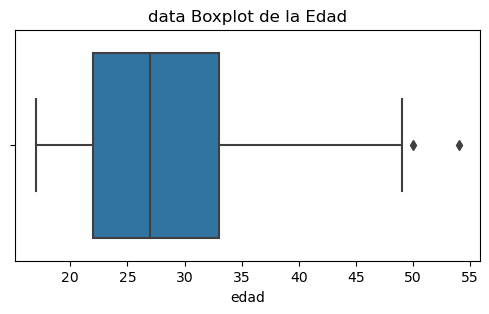

In [ ]:
plt.figure(figsize=(6,3))
#sns.boxplot(titanic['edad'])
sns.boxplot(x=data["edad"])
plt.title('data Boxplot de la Edad')
plt.show()

#Errores tipograficos

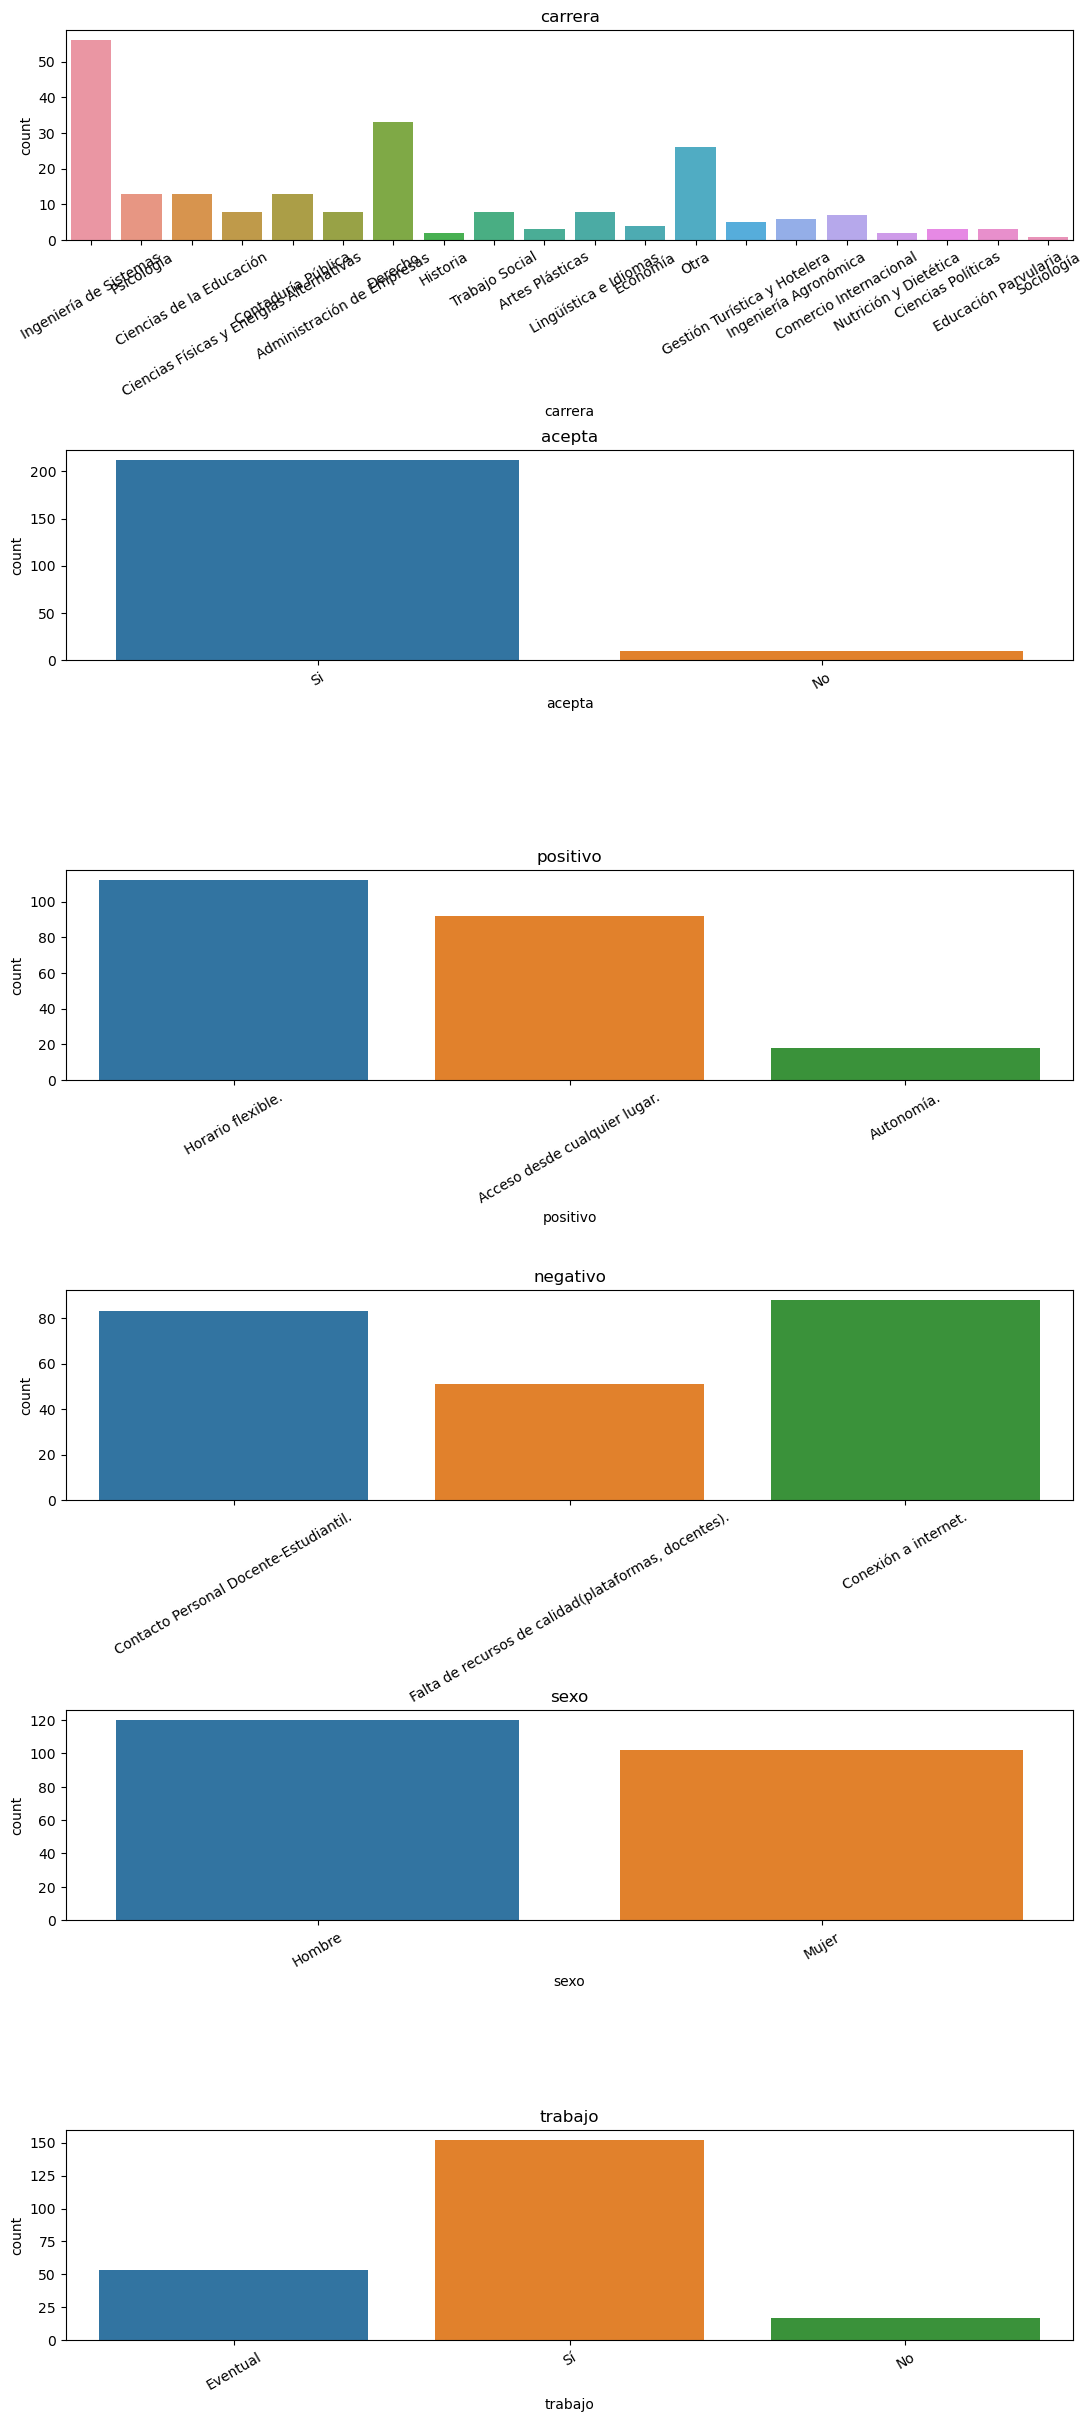

In [ ]:
cols_cat = ['carrera', 'acepta', 'positivo', 'negativo', 'sexo',
       'trabajo']

fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(13,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

##no se encuentran en las categorias subniveles con errores tipograficos.

In [ ]:
data.info

<bound method DataFrame.info of      Unnamed: 0        time                       carrera acepta  \
0             0  2020-11-08        Ingeniería de Sistemas     Si   
1             1  2020-11-08                    Psicología     Si   
2             2  2020-11-08        Ingeniería de Sistemas     Si   
3             3  2020-11-08        Ingeniería de Sistemas     Si   
4             4  2020-11-08        Ingeniería de Sistemas     Si   
..          ...         ...                           ...    ...   
217         230  2020-12-10  Gestión Turística y Hotelera     Si   
218         231  2020-12-11        Ingeniería de Sistemas     No   
219         232  2020-12-11  Gestión Turística y Hotelera     No   
220         233  2020-12-11         Ingeniería Agronómica     Si   
221         234  2020-12-12        Comercio Internacional     Si   

                          positivo  \
0                Horario flexible.   
1    Acceso desde cualquier lugar.   
2                Horario flexible.   

In [ ]:
data.shape

(222, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 0 to 221
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  222 non-null    int64 
 1   time        222 non-null    object
 2   carrera     222 non-null    object
 3   acepta      222 non-null    object
 4   positivo    222 non-null    object
 5   negativo    222 non-null    object
 6   edad        222 non-null    int64 
 7   sexo        222 non-null    object
 8   trabajo     222 non-null    object
dtypes: int64(2), object(7)
memory usage: 17.3+ KB


## ANALISIS EXPLOTAORIO DE DATOS 

2.Análisis exploratorio (Medias, Mediana, Moda. etc) tanto de variables Categóricas como de Numéricas debe incluir mas no limitarse a tablas de resumen, gráficos etc.. con la debida interpretación de los datos¶
df['edad'].mean()


# 1. El problema del negocio

##La Universidad Pública de El Alto ubicada en La Paz-Bolivia decidió realizar una encuesta, en la que quiere saber si sus estudiantes aceptan la modalidad virtual y si estarían de acuerdo en habilitar cursos virtuales permanentes.

## Contenido
1.	hora -> fecha en que el estudiante toma la encuesta.
2.	carrera -> carrera a la que pertenece
3.	acepta -> (Si) si el alumno acepta la modalidad virtual, (No) si la rechaza.
4.	positivo -> Ventajas de estudiar virtualmente.
5.	negativo -> desventajas de estudiar virtualmente.
6.	edad -> edad del estudiante
7.	sexo -> género del estudiante.
8.	trabajo -> si el alumno trabaja


## perfiles
## 1.Si los estudiantes aceptan la modalidad virtual

## 

3. Lectura del dataset

In [ ]:
print(data.shape)
data.head()

(222, 9)


,Unnamed: 0,time,carrera,acepta,positivo,negativo,edad,sexo,trabajo
0,0,2020-11-08,Ingeniería de Sistemas,Si,Horario flexible.,Contacto Personal Docente-Estudiantil.,20,Hombre,Eventual
1,1,2020-11-08,Psicología,Si,Acceso desde cualquier lugar.,Contacto Personal Docente-Estudiantil.,26,Hombre,Eventual
2,2,2020-11-08,Ingeniería de Sistemas,Si,Horario flexible.,"Falta de recursos de calidad(plataformas, doce...",20,Mujer,Sí
3,3,2020-11-08,Ingeniería de Sistemas,Si,Horario flexible.,Conexión a internet.,18,Mujer,No
4,4,2020-11-08,Ingeniería de Sistemas,Si,Acceso desde cualquier lugar.,Contacto Personal Docente-Estudiantil.,39,Hombre,Sí


##vamos analizar cada columna 

In [ ]:
data.info()# podemos ver las variables  categoricas y numericas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 0 to 221
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  222 non-null    int64 
 1   time        222 non-null    object
 2   carrera     222 non-null    object
 3   acepta      222 non-null    object
 4   positivo    222 non-null    object
 5   negativo    222 non-null    object
 6   edad        222 non-null    int64 
 7   sexo        222 non-null    object
 8   trabajo     222 non-null    object
dtypes: int64(2), object(7)
memory usage: 17.3+ KB


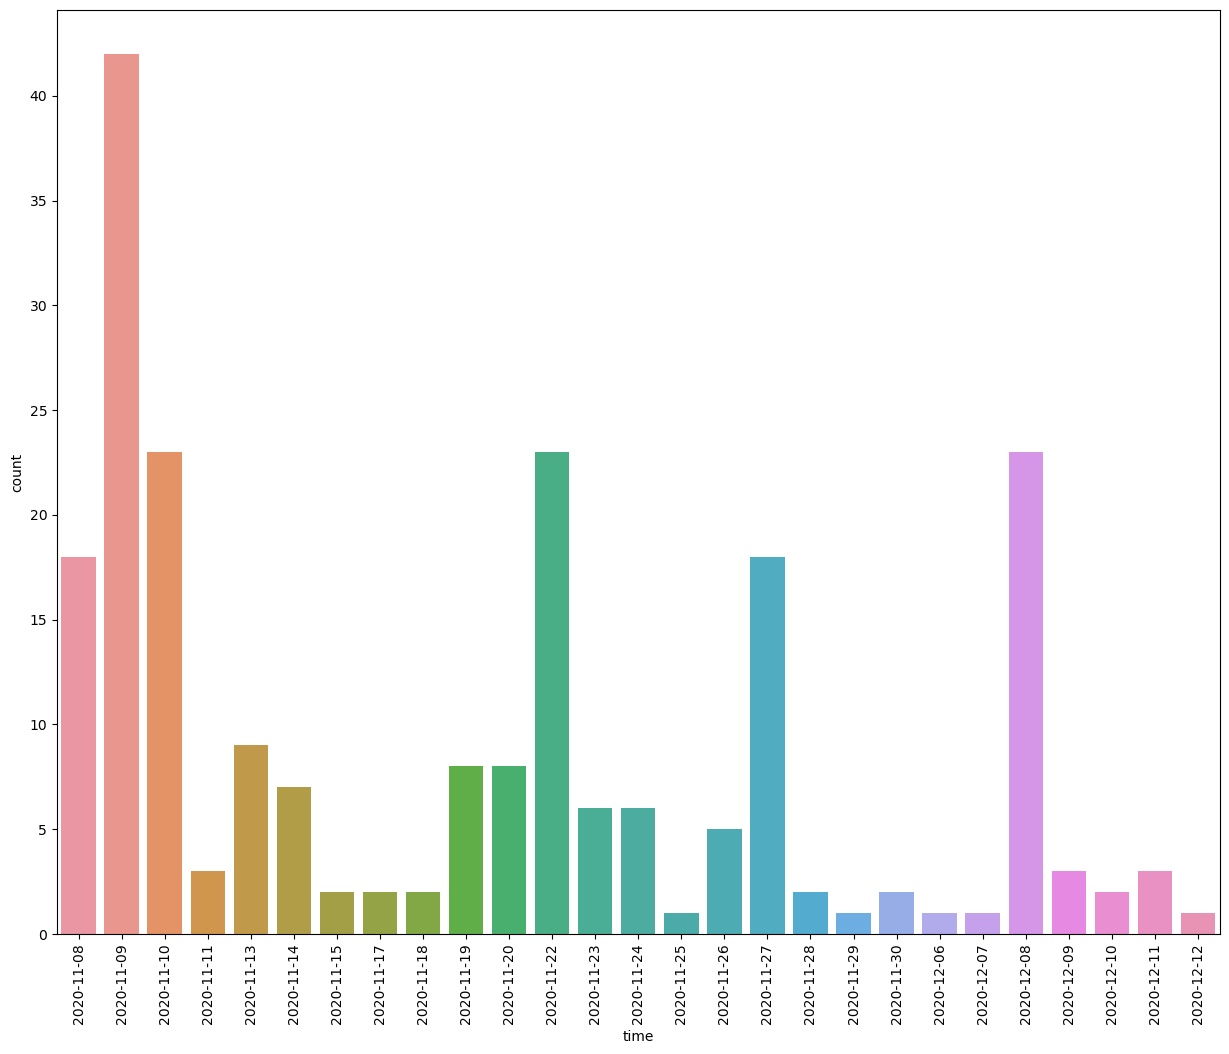

In [ ]:
plt.figure(figsize=(15, 12))
ax = sns.countplot(x='time', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

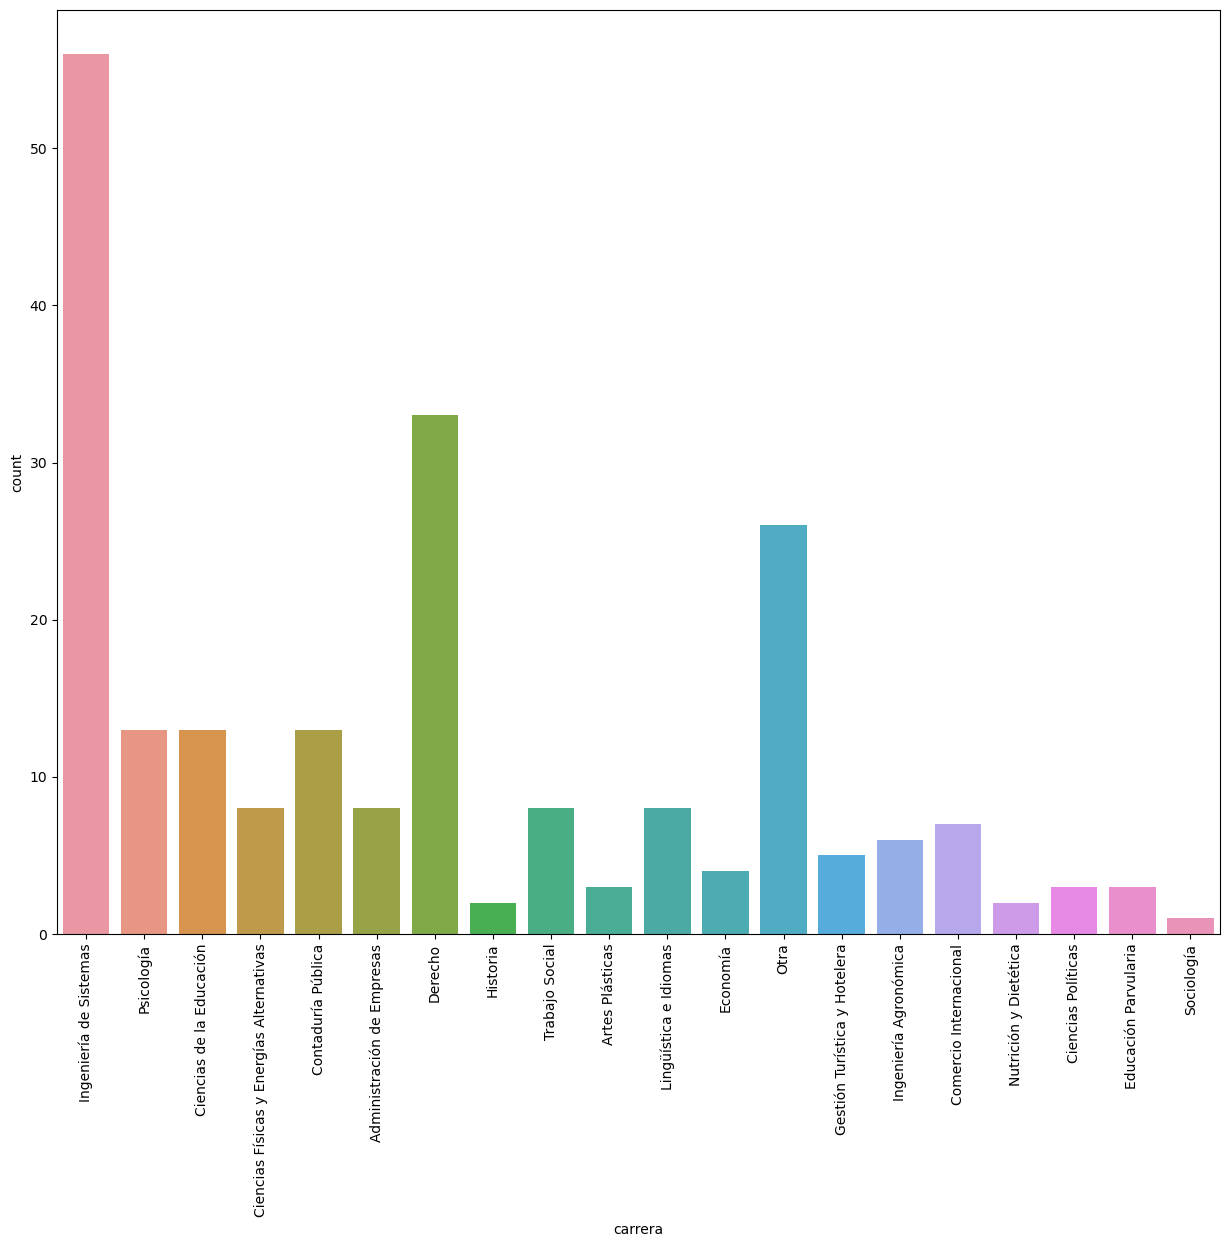

In [ ]:
plt.figure(figsize=(15, 12))
ax = sns.countplot(x='carrera', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

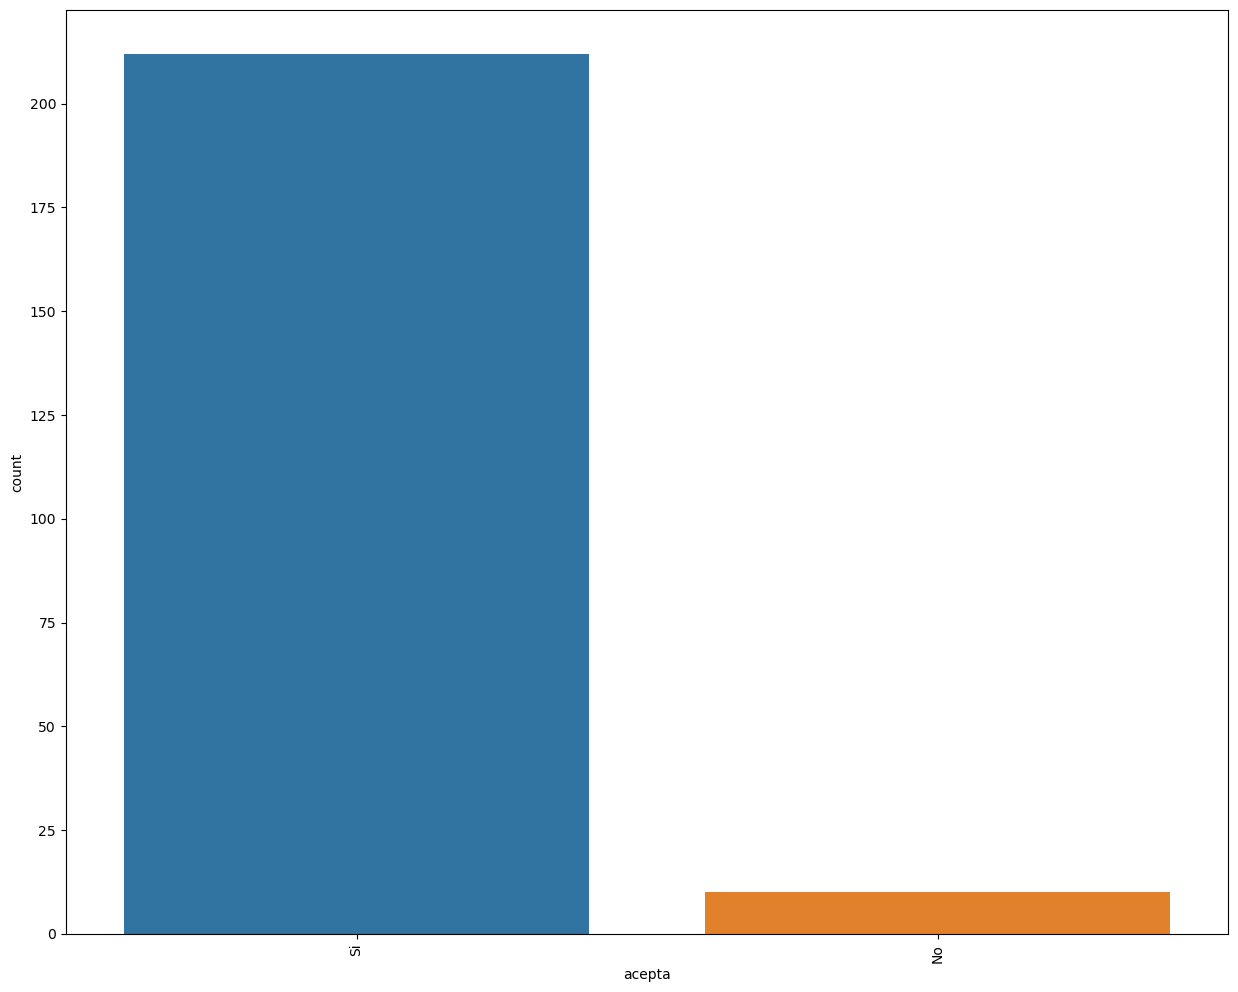

In [ ]:
plt.figure(figsize=(15, 12))
ax = sns.countplot(x='acepta', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

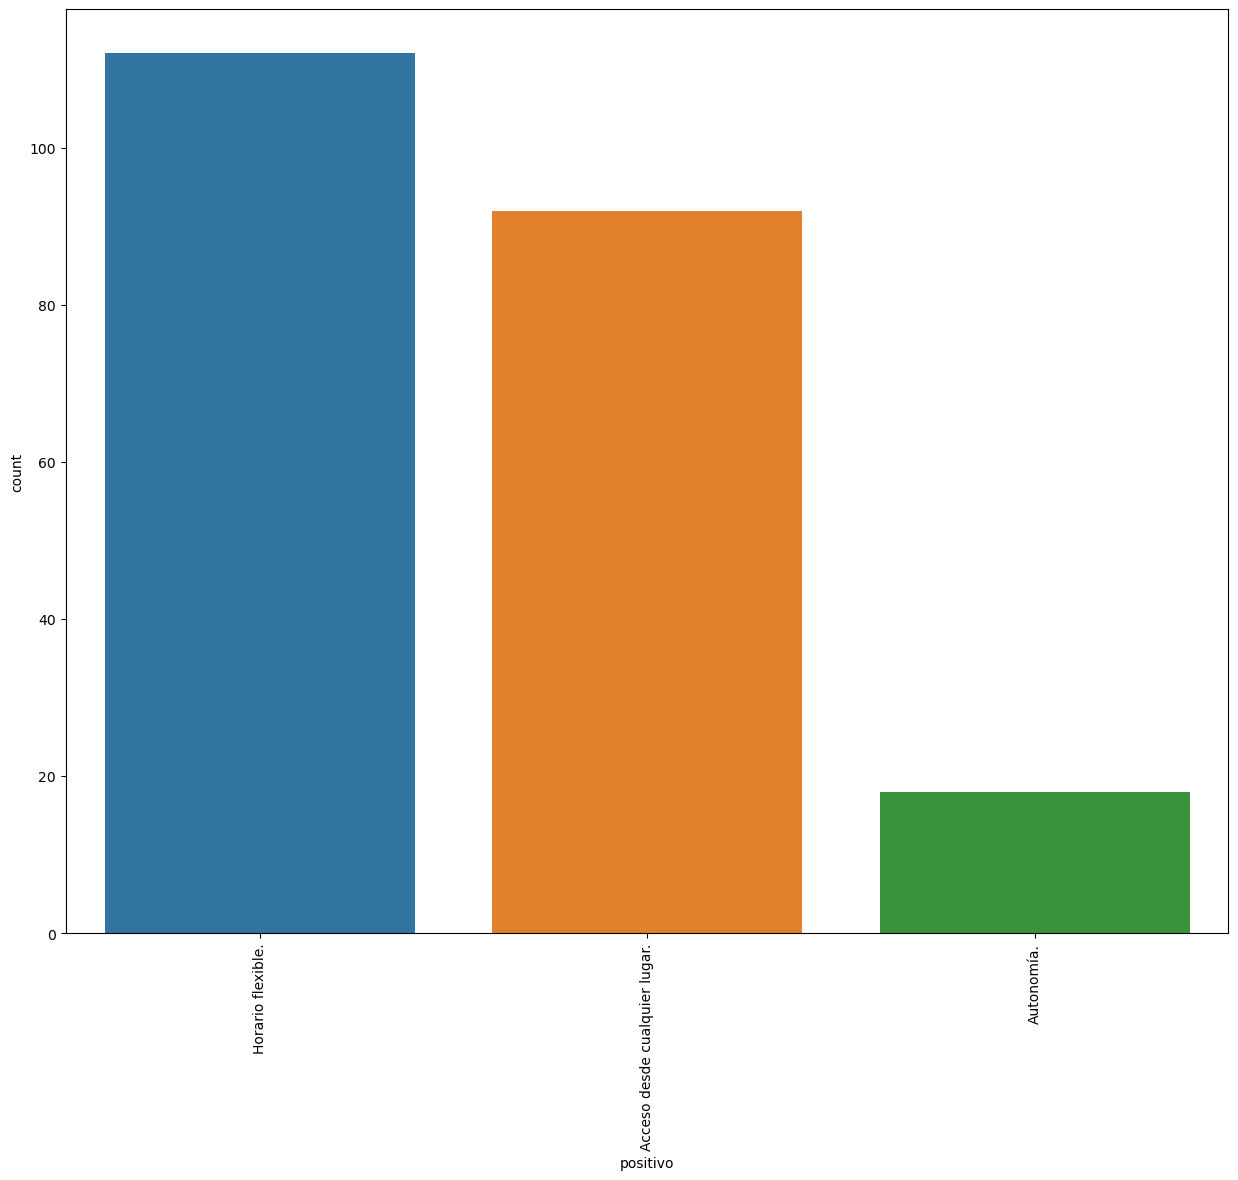

In [ ]:
plt.figure(figsize=(15, 12))
ax = sns.countplot(x='positivo', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

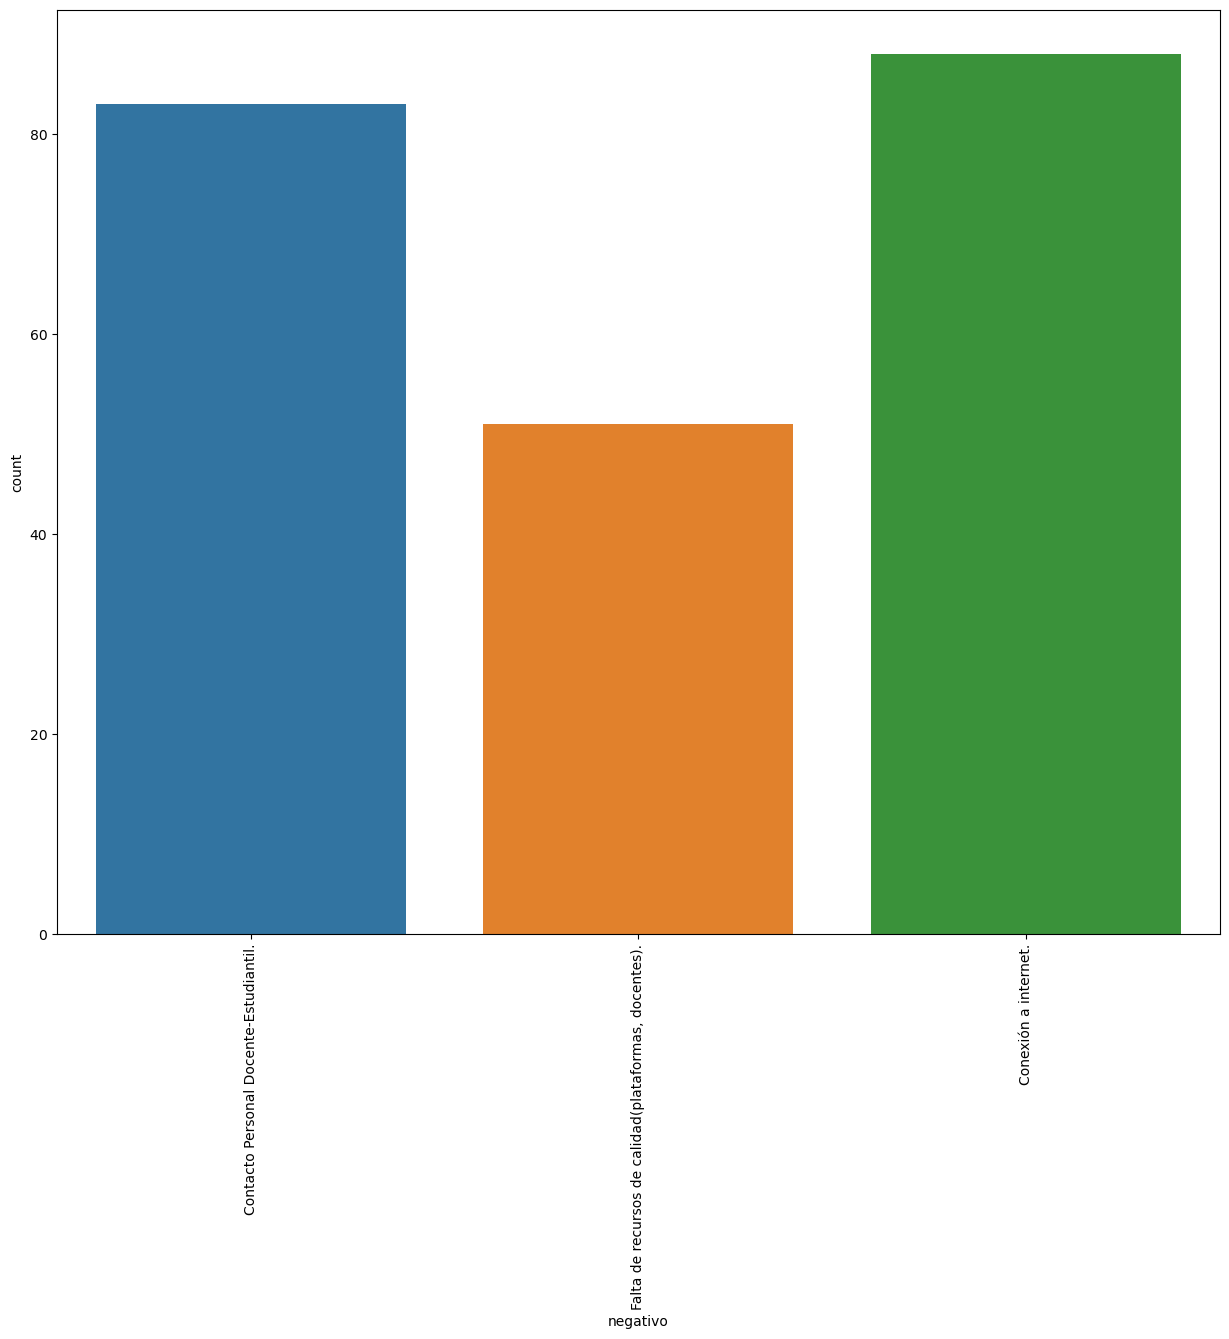

In [ ]:
plt.figure(figsize=(15, 12))
ax = sns.countplot(x='negativo', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

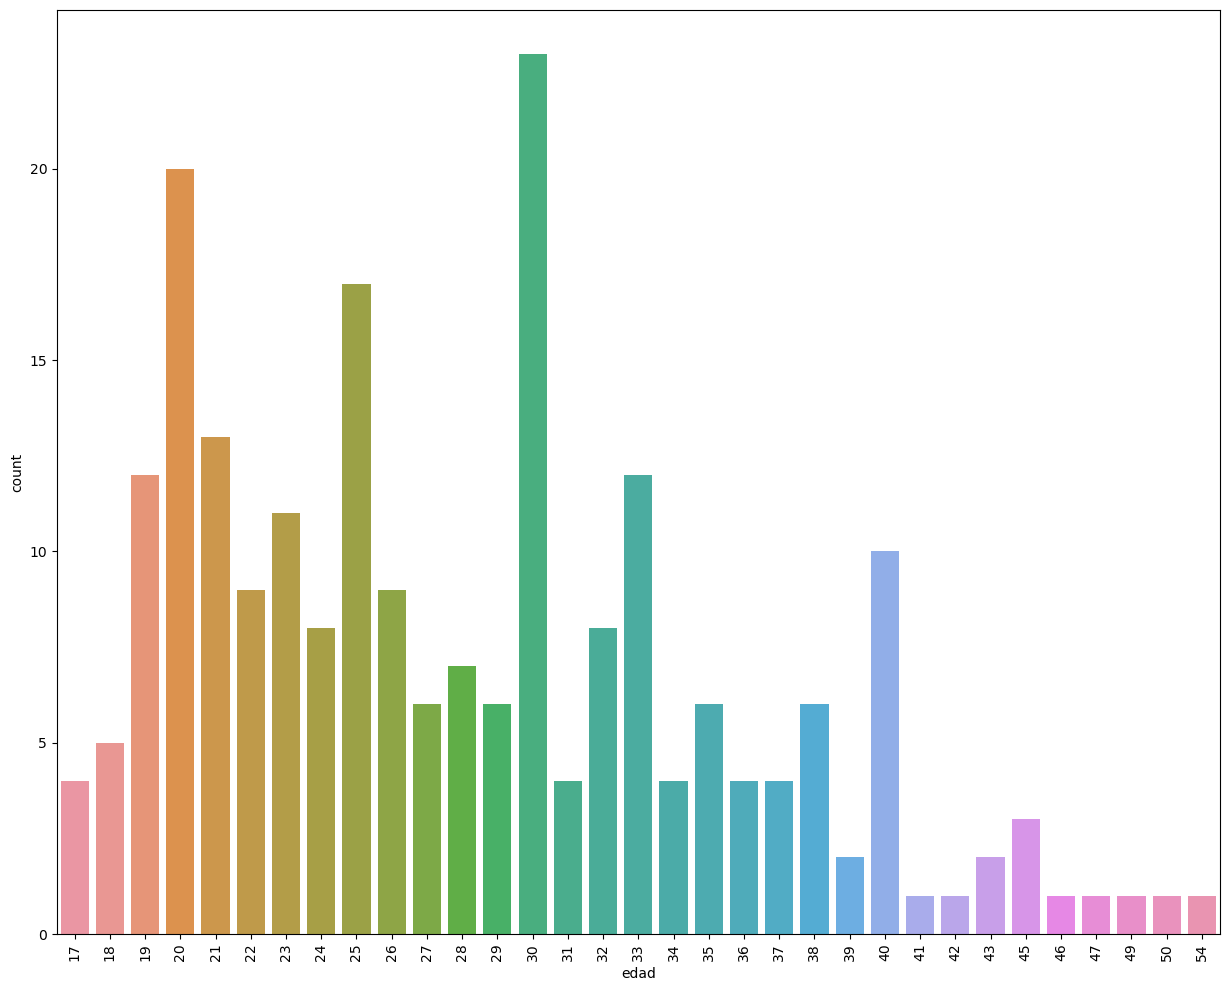

In [ ]:
plt.figure(figsize=(15, 12))
ax = sns.countplot(x='edad', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
media_edad = np.mean(data['edad'])

In [ ]:
media_edad

28.166666666666668

In [ ]:
data['edad'].mode()

0    30
Name: edad, dtype: int64

In [ ]:
desviacion_edad = np.std(data['edad'])

In [ ]:
desviacion_edad

7.539336283227567

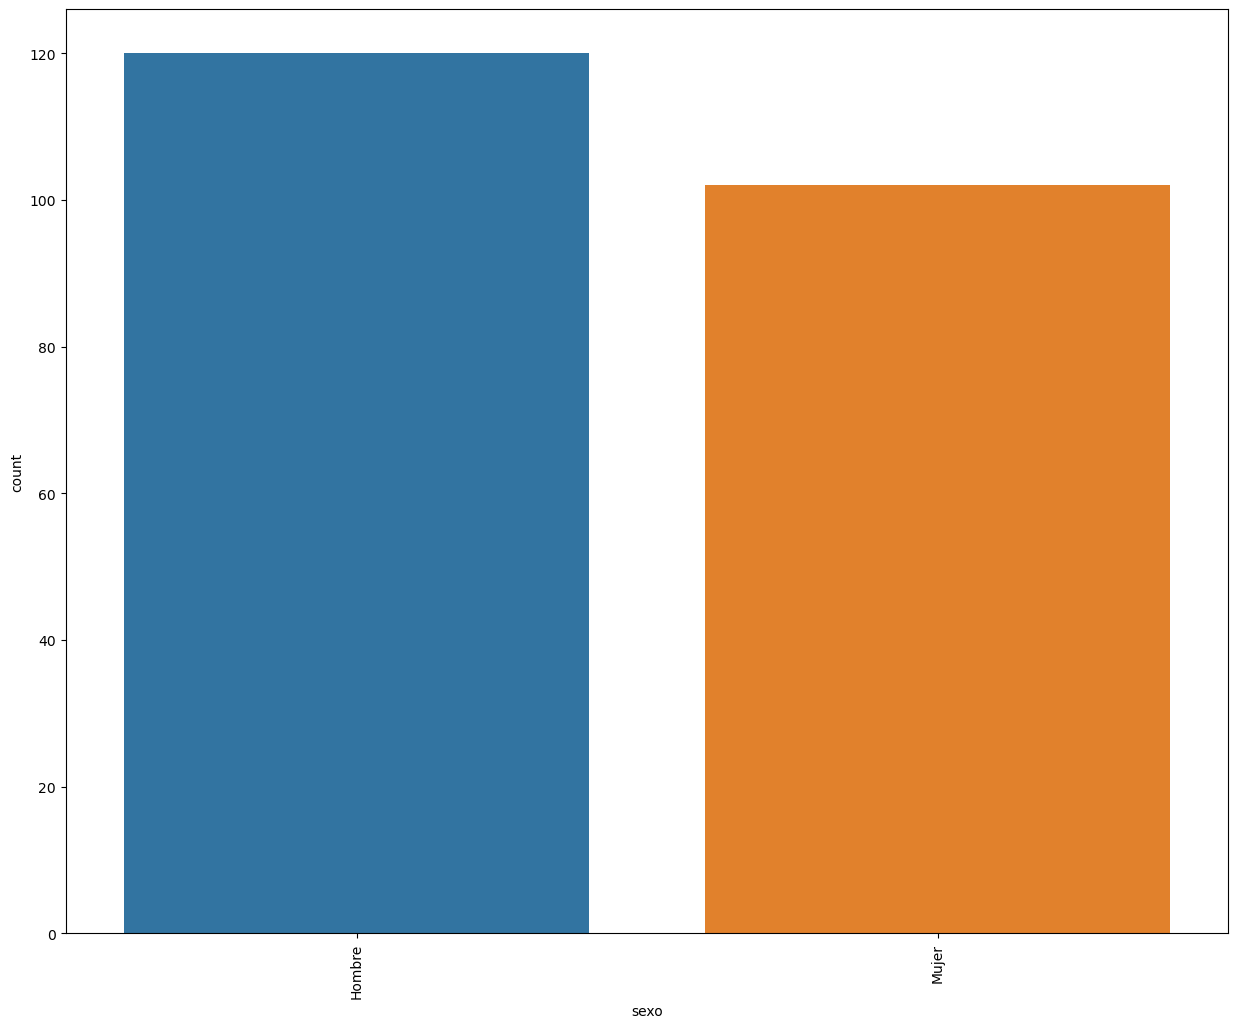

In [ ]:
plt.figure(figsize=(15, 12))
ax = sns.countplot(x='sexo', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

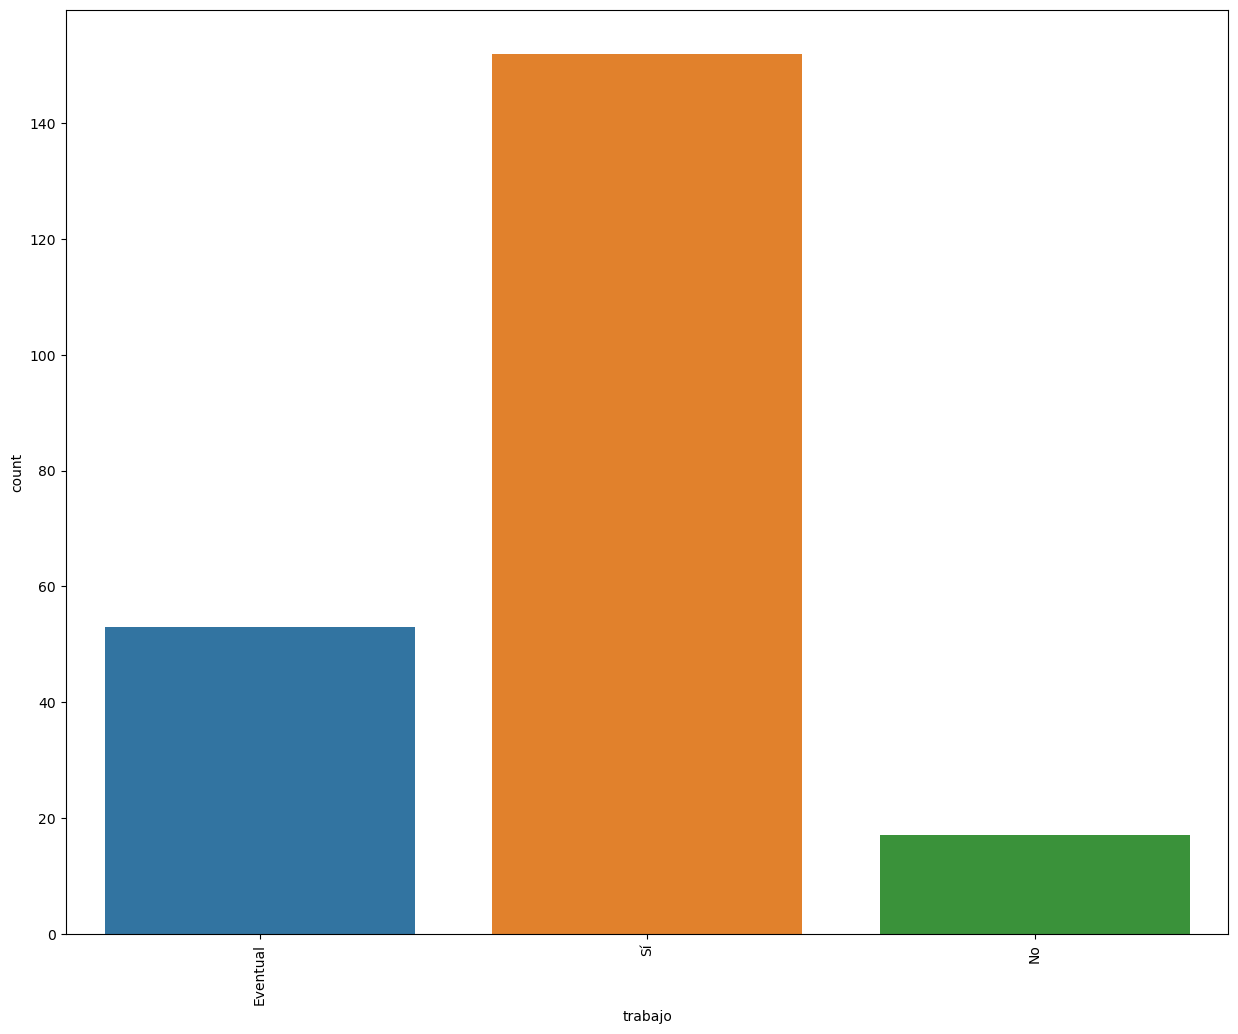

In [ ]:
plt.figure(figsize=(15, 12))
ax = sns.countplot(x='trabajo', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
data.groupby('sexo').size()

sexo
Hombre    120
Mujer     102
dtype: int64

In [ ]:
data.groupby(['sexo','edad']).size()

sexo    edad
Hombre  17       1
        18       3
        19       5
        20      10
        21      12
        22       3
        23       4
        24       3
        25       9
        26       6
        27       2
        28       5
        29       4
        30      11
        31       1
        32       2
        33       9
        34       2
        35       5
        36       2
        37       1
        38       1
        39       2
        40       7
        41       1
        42       1
        43       2
        45       3
        46       1
        49       1
        50       1
Mujer   17       3
        18       2
        19       7
        20      10
        21       1
        22       6
        23       7
        24       5
        25       8
        26       3
        27       4
        28       2
        29       2
        30      12
        31       3
        32       6
        33       3
        34       2
        35       1
        36       2
        37       3

In [ ]:
data.groupby(['sexo','edad']).size().reset_index().rename(columns={0:'Count'})

,sexo,edad,Count
0,Hombre,17,1
1,Hombre,18,3
2,Hombre,19,5
3,Hombre,20,10
4,Hombre,21,12
5,Hombre,22,3
6,Hombre,23,4
7,Hombre,24,3
8,Hombre,25,9
9,Hombre,26,6


In [ ]:
# Contar la cantidad de personas que dijeron sí y no
acepta_count = data['acepta'].value_counts()
print("cantidad de estudiantes que aceptan la modalidad virtual:", acepta_count[1])
print("cantidad de estudiantes que no aceptan la modalidad virtual:", acepta_count[0])

cantidad de estudiantes que aceptan la modalidad virtual: 10
cantidad de estudiantes que no aceptan la modalidad virtual: 212


In [ ]:
#Veamos inicialmente el comportamiento de las variables numéricas ('age' )

In [ ]:
# Podemos extraer algunas variables estadísticas descriptivas básicas
data.describe()

,Unnamed: 0,edad
count,222.000000,222.000000
mean,119.896396,28.166667
std,67.424522,7.556374
min,0.000000,17.000000
25%,63.250000,22.000000
50%,121.500000,27.000000
75%,177.750000,33.000000
max,234.000000,54.000000


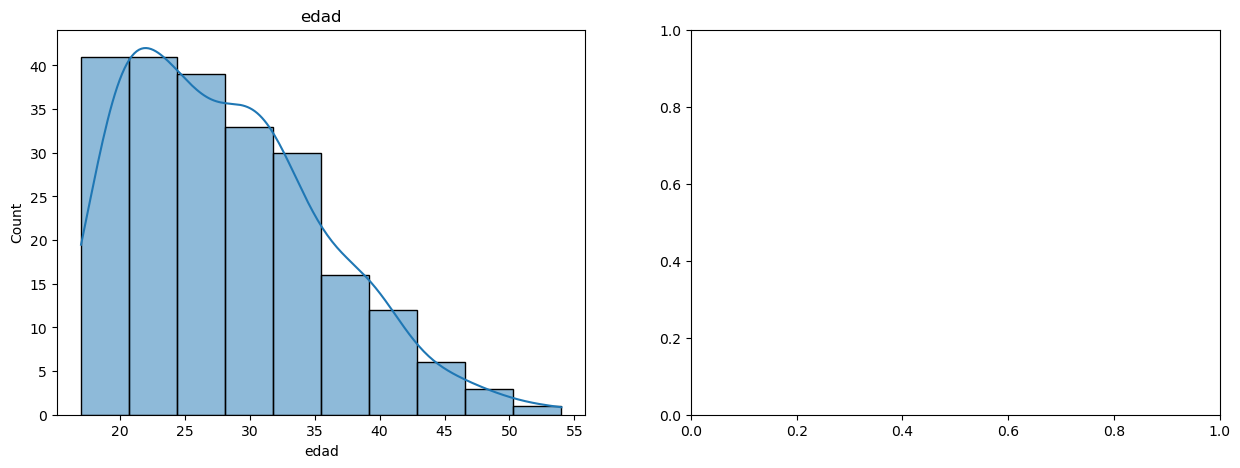

In [ ]:
# Pero muchas veces es más útil graficar dichas variables

# Dibujar histogramas
col_num = ['edad',]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    if col == 'edad':
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data=data, ax=ax[i], bins=nbins, kde = True)
    ax[i].set_title(col)

#histogramas

La mayor parte del grupo de estudiantes  encuestados estaban entre los 15 y 35 años con sesgo 40 a 55 años

#3. . Descubrir posibles relaciones entre variables (Ej. en el caso del titanic como se relaciona el sexo con la supervivencia) ideal(Obligatorio) si pueden combinar más de 2 variables para el análisis (Ej. Sexo, Supervivencia y Clase del Ticket)

In [ ]:
# Contar la cantidad de personas que dijeron sí y no
acepta_count = data['acepta'].value_counts()
print("cantidad de estudiantes que aceptan la modalidad virtual:", acepta_count[0])
print("cantidad de estudiantes que no aceptan la modalidad virtual:", acepta_count[1])

cantidad de estudiantes que aceptan la modalidad virtual: 212
cantidad de estudiantes que no aceptan la modalidad virtual: 10


Text(0.5, 1.0, 'Razones negativas por las que los estudiantes no aceptarían las clases virtuales')

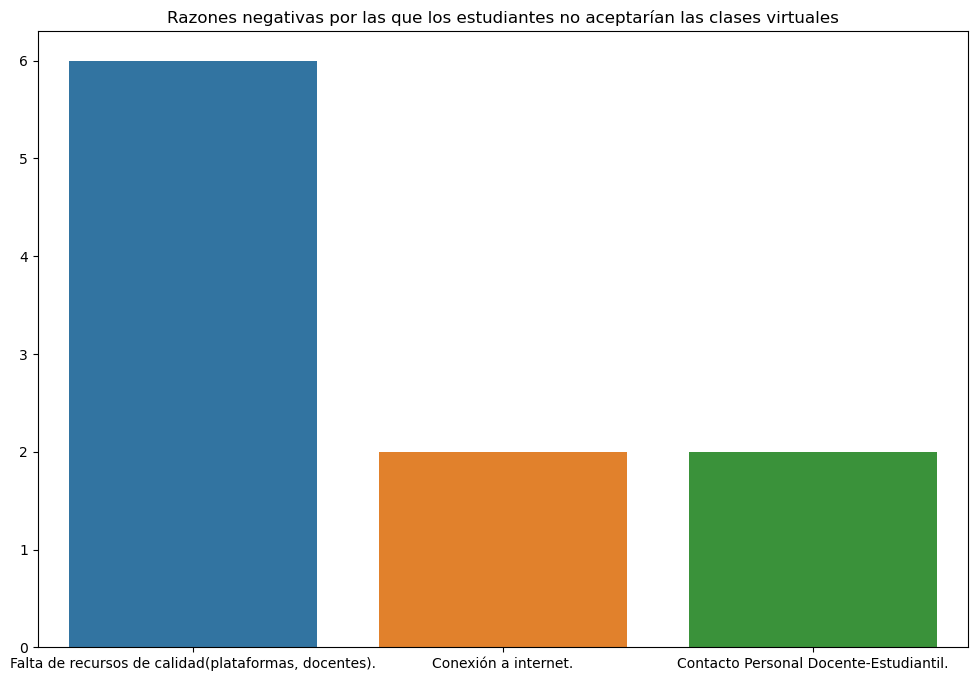

In [ ]:
# Filtrar los registros que indican que los estudiantes no aceptarían las clases virtuales
rechazos = data[data['acepta'] == 'No']

# Contar las razones negativas por las que los estudiantes no aceptarían las clases virtuales
razones_negativas = rechazos['negativo'].value_counts()

# Graficar los resultados
plt.figure(figsize=(12, 8))
sns.barplot(x=razones_negativas.index, y=razones_negativas.values)
plt.title('Razones negativas por las que los estudiantes no aceptarían las clases virtuales')

In [ ]:
data.groupby(['sexo','trabajo']).size()

sexo    trabajo 
Hombre  Eventual    31
        No           5
        Sí          84
Mujer   Eventual    22
        No          12
        Sí          68
dtype: int64

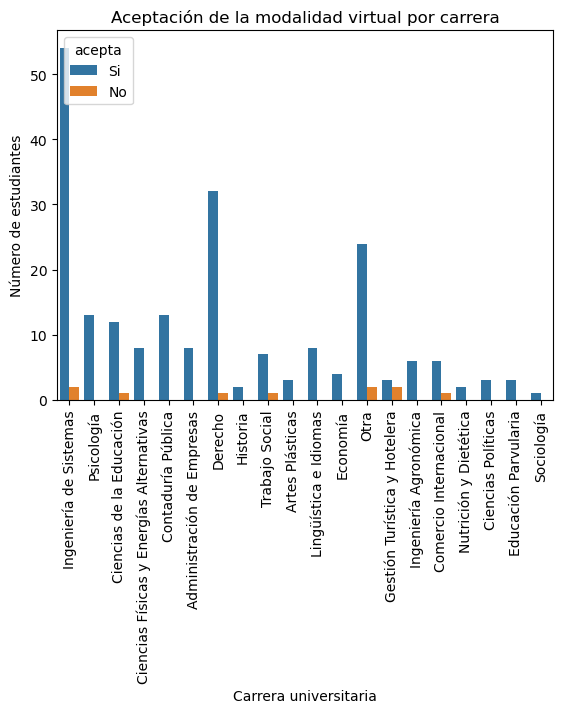

In [ ]:
# Gráfico de barras de la aceptación de la modalidad virtual por carrera
sns.countplot(x='carrera', hue='acepta', data=data)

# Rotar etiquetas del eje x para que no se superpongan
plt.xticks(rotation=90)

# Agregar título y etiquetas de los ejes
plt.title("Aceptación de la modalidad virtual por carrera")
plt.xlabel("Carrera universitaria")
plt.ylabel("Número de estudiantes")

# Mostrar gráfico
plt.show()

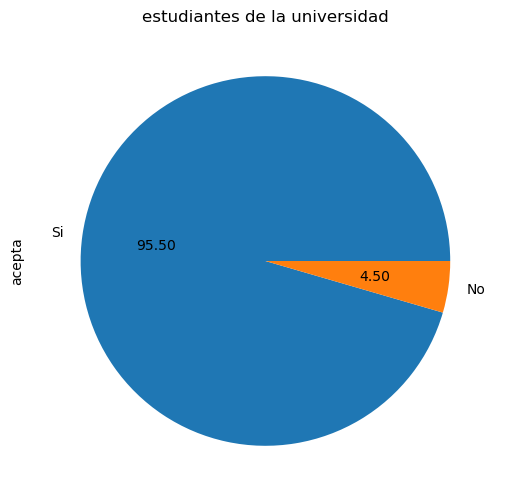

In [ ]:
# Gráfico de tarta de pasajeros del Titanic
plot = data['acepta'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='estudiantes de la universidad')



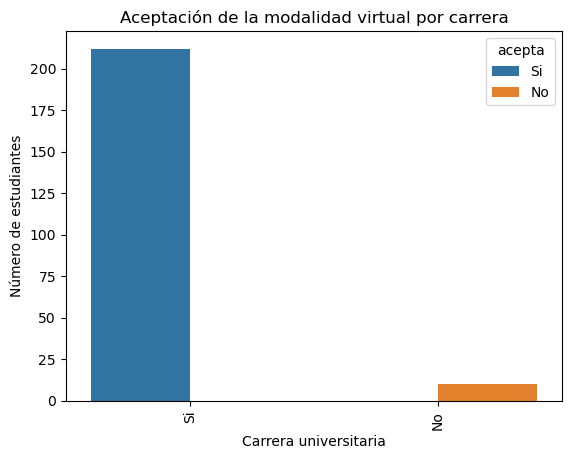

In [ ]:
# Gráfico de barras de la aceptación de la modalidad virtual por carrera
sns.countplot(x='acepta', hue='acepta', data=data)

# Rotar etiquetas del eje x para que no se superpongan
plt.xticks(rotation=90)

# Agregar título y etiquetas de los ejes
plt.title("Aceptación de la modalidad virtual por carrera")
plt.xlabel("Carrera universitaria")
plt.ylabel("Número de estudiantes")

# Mostrar gráfico
plt.show()

In [ ]:
# Tabla de contingencia class / survived
pd.crosstab(index=data['carrera'],
            columns=data['trabajo'], margins=True)

trabajo,Eventual,No,Sí,All
carrera,,,,
Administración de Empresas,1,0,7,8
Artes Plásticas,1,0,2,3
Ciencias Físicas y Energías Alternativas,5,0,3,8
Ciencias Políticas,1,0,2,3
Ciencias de la Educación,1,4,8,13
Comercio Internacional,1,0,6,7
Contaduría Pública,2,1,10,13
Derecho,10,2,21,33
Economía,1,0,3,4


In [ ]:
pd.value_counts(data['negativo'])

Conexión a internet.                                    88
Contacto Personal Docente-Estudiantil.                  83
Falta de recursos de calidad(plataformas, docentes).    51
Name: negativo, dtype: int64

In [ ]:
pd.value_counts(data['time'])

2020-11-09    42
2020-11-22    23
2020-11-10    23
2020-12-08    23
2020-11-08    18
2020-11-27    18
2020-11-13     9
2020-11-19     8
2020-11-20     8
2020-11-14     7
2020-11-23     6
2020-11-24     6
2020-11-26     5
2020-11-11     3
2020-12-09     3
2020-12-11     3
2020-11-18     2
2020-11-17     2
2020-11-15     2
2020-11-28     2
2020-11-30     2
2020-12-10     2
2020-11-25     1
2020-11-29     1
2020-12-06     1
2020-12-07     1
2020-12-12     1
Name: time, dtype: int64

In [ ]:
pd.value_counts(data['positivo'])

Horario flexible.                112
Acceso desde cualquier lugar.     92
Autonomía.                        18
Name: positivo, dtype: int64

In [ ]:
pd.value_counts(data['acepta'])

Si    212
No     10
Name: acepta, dtype: int64

In [ ]:
# tabla de frecuencia relativa de los estudiantes
100 * data['trabajo'].value_counts() / len(data['trabajo'])

Sí          68.468468
Eventual    23.873874
No           7.657658
Name: trabajo, dtype: float64

In [ ]:
print (data.iloc[0])

Unnamed: 0                                         0
time                                      2020-11-08
carrera                       Ingeniería de Sistemas
acepta                                            Si
positivo                           Horario flexible.
negativo      Contacto Personal Docente-Estudiantil.
edad                                              20
sexo                                          Hombre
trabajo                                     Eventual
Name: 0, dtype: object


In [ ]:
print (data[['carrera','edad']])

                          carrera  edad
0          Ingeniería de Sistemas    20
1                      Psicología    26
2          Ingeniería de Sistemas    20
3          Ingeniería de Sistemas    18
4          Ingeniería de Sistemas    39
..                            ...   ...
217  Gestión Turística y Hotelera    19
218        Ingeniería de Sistemas    23
219  Gestión Turística y Hotelera    25
220         Ingeniería Agronómica    20
221        Comercio Internacional    23

[222 rows x 2 columns]


In [ ]:
#suma de las columna 
print(sum(data['edad']))

6253


In [ ]:
data.dtypes

Unnamed: 0     int64
time          object
carrera       object
acepta        object
positivo      object
negativo      object
edad           int64
sexo          object
trabajo       object
dtype: object

In [ ]:
data['edad'].describe()

count    222.000000
mean      28.166667
std        7.556374
min       17.000000
25%       22.000000
50%       27.000000
75%       33.000000
max       54.000000
Name: edad, dtype: float64

In [ ]:
data['time'].describe()

count            222
unique            27
top       2020-11-09
freq              42
Name: time, dtype: object

@cuales fueron las carreras mas aceptadas.

In [ ]:
grupo_carrera = data.groupby('carrera')
grupo_carrera.describe()

Unnamed: 0                         \
                                              count        mean        std   
carrera                                                                      
Administración de Empresas                      8.0  112.375000  64.471339   
Artes Plásticas                                 3.0  133.333333  97.325913   
Ciencias Físicas y Energías Alternativas        8.0  120.375000  60.850960   
Ciencias Políticas                              3.0  157.000000  32.046841   
Ciencias de la Educación                       13.0  125.461538  74.562742   
Comercio Internacional                          7.0  189.428571  58.100078   
Contaduría Pública                             13.0  120.769231  65.388778   
Derecho                                        33.0  107.606061  58.845104   
Economía                                        4.0  111.250000  90.227028   
Educación Parvularia                            3.0  143.666667  16.802778   
Gestión Turística y Hotelera                    5.0  170.200000  75.539394   
Historia                                        2.0   62.000000  57.982756   
Ingeniería Agronómica                           6.0  173.333333  69.177067   
Ingeniería de Sistemas                         56.0   95.125000  67.756801   
Lingüística e Idiomas                           8.0  132.500000  80.826092   
Nutrición y Dietética                           2.0  144.000000  56.568542   
Otra                                           26.0  131.769231  54.295715   
Psicología                                     13.0  123.000000  72.074036   
Sociología                                      1.0  131.000000        NaN   
Trabajo Social                                  8.0  135.500000  76.999072   

                                                                               \
                                            min     25%    50%     75%    max   
carrera                                                                         
Administración de Empresas                 18.0   86.75  113.5  149.00  193.0   
Artes Plásticas                            23.0   96.50  170.0  188.50  207.0   
Ciencias Físicas y Energías Alternativas   12.0   99.50  138.5  150.00  196.0   
Ciencias Políticas                        120.0  147.50  175.0  175.50  176.0   
Ciencias de la Educación                    5.0   77.00  157.0  183.00  226.0   
Comercio Internacional                     72.0  181.50  213.0  222.00  234.0   
Contaduría Pública                         14.0   83.00  121.0  159.00  219.0   
Derecho                                    19.0   71.00   94.0  164.00  224.0   
Economía                                   33.0   33.75  106.0  183.50  200.0   
Educación Parvularia                      129.0  134.50  140.0  151.00  162.0   
Gestión Turística y Hotelera               46.0  171.00  172.0  230.00  232.0   
Historia                                   21.0   41.50   62.0   82.50  103.0   
Ingeniería Agronómica                      62.0  134.00  202.0  222.75  233.0   
Ingeniería de Sistemas                      0.0   48.75   75.0  148.50  231.0   
Lingüística e Idiomas                      24.0   62.50  155.5  194.75  218.0   
Nutrición y Dietética                     104.0  124.00  144.0  164.00  184.0   
Otra                                       39.0   98.25  133.5  177.25  216.0   
Psicología                                  1.0   86.00  128.0  166.00  228.0   
Sociología                                131.0  131.00  131.0  131.00  131.0   
Trabajo Social                             22.0   82.75  119.5  214.25  229.0   

                                          edad                              \
                                         count       mean        std   min   
carrera                                                                      
Administración de Empresas                 8.0  25.375000   4.565007  19.0   
Artes Plásticas                            3.0  30.000000  10.000000  

In [ ]:
#listar las edades de los estudiantes que decidieron estudiar virtual

pd.unique(data['edad'])

array([20, 26, 18, 39, 25, 32, 21, 22, 19, 24, 28, 30, 35, 34, 46, 29, 36,
       33, 45, 23, 27, 38, 50, 31, 42, 40, 17, 37, 49, 41, 54, 47, 43],
      dtype=int64)

In [ ]:
data.sort_values(by='edad',ascending=False)[['time','acepta','edad']].head(20)

In [ ]:
## estadistica para sacar  el numero de hombre y mujeres que aceptaron
num_hombres = data[(data['sexo'] == 'Hombre') & (data['acepta'] == 'Si')].shape[0]
num_mujeres = data[(data['sexo'] == 'Mujer') & (data['acepta'] == 'Si')].shape[0]

print('Número de hombres que aceptaron estudiar virtualmente:', num_hombres)
print('Número de mujeres que aceptaron estudiar virtualmente:', num_mujeres)

Número de hombres que aceptaron estudiar virtualmente: 114
Número de mujeres que aceptaron estudiar virtualmente: 98


In [ ]:
num_hombres = data[(data['sexo'] == 'Hombre') & (data['acepta'] == 'No')].shape[0]
num_mujeres = data[(data['sexo'] == 'Mujer') & (data['acepta'] == 'No')].shape[0]

print('Número de hombres que no aceptaron estudiar virtualmente:', num_hombres)
print('Número de mujeres que  noaceptaron estudiar virtualmente:', num_mujeres)

Número de hombres que no aceptaron estudiar virtualmente: 6
Número de mujeres que  noaceptaron estudiar virtualmente: 4


In [ ]:
# Agrupar por género y carrera y contar el número de estudiantes en cada grupo
estudiantes_por_genero_y_carrera = data.groupby(['sexo', 'carrera'])['edad'].count()

# Imprimir el resultado
print(estudiantes_por_genero_y_carrera)

In [ ]:
#cual es la carrera mas popular entre los estudiantes
# Contar la cantidad de veces que aparece cada carrera
carreras_populares = data['carrera'].value_counts()

# Obtener el nombre de la carrera más popular
carrera_mas_popular = carreras_populares.idxmax()

# Imprimir el resultado
print("La carrera más popular entre los estudiantes es:", carrera_mas_popular)

La carrera más popular entre los estudiantes es: Ingeniería de Sistemas


In [ ]:
#¿Hay alguna relación entre el género y la elección de carrera?

# Crear tabla de contingencia
table = pd.crosstab(data['carrera'], data['sexo'])

NameError: name 'pd' is not defined

In [ ]:
from scipy.stats import chi2_contingency

# Realizar prueba de chi-cuadrado
chi2, pval, dof, expected = chi2_contingency(table)

NameError: name 'table' is not defined

In [ ]:
table

NameError: name 'table' is not defined

## es resultado es una tabla de contigencia que nos muestra la cantidad de estudiantes de cada genero que han elegido cada carrera

ejmplo podemos ver que 42 hombres y 14 mujeres se han matriculado en Ingenieria de sistemas, lo que indica que esta carrera es muy popular


 por otro lado podemos obaservar que mas mujeres  que hombres matriculados en contaduria Publica y ciencia de la Educacion.

En resumen, podemos usar esta tabla para analizar la relación entre el género y la elección de carrera, y podemos concluir que hay algunas carreras que son más populares entre un género en particular.

In [ ]:

# crear tabla de contingencia
tabla_contingencia = pd.crosstab(data['negativo'], data['carrera'])

# calcular porcentajes por fila
tabla_contingencia_porcentajes = tabla_contingencia.div(tabla_contingencia.sum(axis=1), axis=0) * 100

print(tabla_contingencia_porcentajes)


Es una matrix de datos,que muestra la frecuencia de respuestas negativas de estudiantes en diferentes carreras a tres posibles problemas


##4.Enriquecimiento de los datos con otros datasets (Mínimo 1 adicional). Combinar diferentes fuentes de información con funciones tipo (Merge) por Ejemplo si tenemos una base de datos de Diabetes y tenemos el municipio o el departamento buscar Un dataset por ejemplo del DANE que nos relacione el PIB por departamento y nos permita hacer análisis exploratorio (si es posible pruebas de hipótesis) sobre si el PIB del departamento encontrado infiere con que incremente o se reduzca la cantidad de personas con esta enfermedad

mport pandas as pd


In [ ]:
data.head()

,Unnamed: 0,time,carrera,acepta,positivo,negativo,edad,sexo,trabajo
0,0,2020-11-08,Ingeniería de Sistemas,Si,Horario flexible.,Contacto Personal Docente-Estudiantil.,20,Hombre,Eventual
1,1,2020-11-08,Psicología,Si,Acceso desde cualquier lugar.,Contacto Personal Docente-Estudiantil.,26,Hombre,Eventual
2,2,2020-11-08,Ingeniería de Sistemas,Si,Horario flexible.,"Falta de recursos de calidad(plataformas, doce...",20,Mujer,Sí
3,3,2020-11-08,Ingeniería de Sistemas,Si,Horario flexible.,Conexión a internet.,18,Mujer,No
4,4,2020-11-08,Ingeniería de Sistemas,Si,Acceso desde cualquier lugar.,Contacto Personal Docente-Estudiantil.,39,Hombre,Sí


In [ ]:
data.shape

(222, 9)

In [ ]:
# Cargar el dataset
dataset = pd.read_csv("matriculas.csv")


In [ ]:
dataset.shape

(27, 30)

In [ ]:
dataset.head()

,TIPO DE MATRICULA,DEPARTAMENTO,Hombres-2008,Mujeres-2008,Hombres-2009,Mujeres-2009,Hombres-2010,Mujeres-2010,Hombres-2011,Mujeres-2011,...,Hombres-2017,Mujeres-2017,Hombres-2018,Mujeres-2018,Hombres-2019,Mujeres-2019,Hombres-2020,Mujeres-2020,Hombres-2021,Mujeres-2021
0,MATRICULADOS,Chuquisaca,17382,16313,18718,17340,20392,18835,21751,20351,...,26150,25265,26952,25813,25576,24619,24701,23735,24876,25164
1,MATRICULADOS,La Paz,48663,45933,50342,47726,52010,50038,53255,51952,...,68117,69062,69785,73775,70628,75952,79632,68955,71521,76881
2,MATRICULADOS,Cochabamba,31755,29723,30925,29319,31435,29367,33562,32686,...,43407,45346,43697,46413,42491,47004,39855,44243,43646,49000
3,MATRICULADOS,Oruro,11536,8480,11718,8683,12116,9013,12642,9406,...,14690,11556,14839,11607,15013,11936,15344,12370,16523,13654
4,MATRICULADOS,Potosí,10791,10195,10610,9819,10745,10001,10611,10340,...,15224,15986,15446,15912,14097,14676,13781,14622,16755,18025


In [ ]:
#Unir dos Daframe
data = pd.read_csv("ModalidadVirtual.csv")

In [ ]:
data.head(5)

,Unnamed: 0,time,carrera,acepta,positivo,negativo,edad,sexo,trabajo
0,0,2020-11-08,Ingeniería de Sistemas,Si,Horario flexible.,Contacto Personal Docente-Estudiantil.,20,Hombre,Eventual
1,1,2020-11-08,Psicología,Si,Acceso desde cualquier lugar.,Contacto Personal Docente-Estudiantil.,26,Hombre,Eventual
2,2,2020-11-08,Ingeniería de Sistemas,Si,Horario flexible.,"Falta de recursos de calidad(plataformas, doce...",20,Mujer,Sí
3,3,2020-11-08,Ingeniería de Sistemas,Si,Horario flexible.,Conexión a internet.,18,Mujer,No
4,4,2020-11-08,Ingeniería de Sistemas,Si,Acceso desde cualquier lugar.,Contacto Personal Docente-Estudiantil.,39,Hombre,Sí


In [ ]:
##segundo daframe
dataset = pd.read_csv("matriculas.csv")

In [ ]:
dataset.head(5)

,TIPO DE MATRICULA,DEPARTAMENTO,Hombres-2008,Mujeres-2008,Hombres-2009,Mujeres-2009,Hombres-2010,Mujeres-2010,Hombres-2011,Mujeres-2011,...,Hombres-2017,Mujeres-2017,Hombres-2018,Mujeres-2018,Hombres-2019,Mujeres-2019,Hombres-2020,Mujeres-2020,Hombres-2021,Mujeres-2021
0,MATRICULADOS,Chuquisaca,17382,16313,18718,17340,20392,18835,21751,20351,...,26150,25265,26952,25813,25576,24619,24701,23735,24876,25164
1,MATRICULADOS,La Paz,48663,45933,50342,47726,52010,50038,53255,51952,...,68117,69062,69785,73775,70628,75952,79632,68955,71521,76881
2,MATRICULADOS,Cochabamba,31755,29723,30925,29319,31435,29367,33562,32686,...,43407,45346,43697,46413,42491,47004,39855,44243,43646,49000
3,MATRICULADOS,Oruro,11536,8480,11718,8683,12116,9013,12642,9406,...,14690,11556,14839,11607,15013,11936,15344,12370,16523,13654
4,MATRICULADOS,Potosí,10791,10195,10610,9819,10745,10001,10611,10340,...,15224,15986,15446,15912,14097,14676,13781,14622,16755,18025


In [ ]:
print(comparacion)

Empty DataFrame
Columns: [carrera, DEPARTAMENTO]
Index: []


In [ ]:
# Renombrar la columna de "TIPO DE MATRICULA" a "carrera" en la segunda base de datos
dataset = dataset.rename(columns={"TIPO DE MATRICULA": "carrera"})

In [ ]:
# Fusionar las dos bases de datos por la columna "carrera"
df_merged = pd.merge(data, dataset, on="carrera")


In [ ]:
# Seleccionar las columnas de interés
comparacion = df_merged[["positivo", "DEPARTAMENTO"]]

In [ ]:
# Imprimir la tabla comparativa
print(comparacion)

Empty DataFrame
Columns: [carrera, Mujeres-2021]
Index: []


In [ ]:
# cargar los datos del primer dataset
data = pd.read_csv("ModalidadVirtual.csv")


In [ ]:
# cargar los datos del segundo dataset
dataset = pd.read_csv("matriculas.csv")

In [ ]:
data["carrera"].unique()

array(['Ingeniería de Sistemas', 'Psicología', 'Ciencias de la Educación',
       'Ciencias Físicas y Energías Alternativas', 'Contaduría Pública',
       'Administración de Empresas', 'Derecho', 'Historia',
       'Trabajo Social', 'Artes Plásticas', 'Lingüística e Idiomas',
       'Economía', 'Otra', 'Gestión Turística y Hotelera',
       'Ingeniería Agronómica', 'Comercio Internacional',
       'Nutrición y Dietética', 'Ciencias Políticas',
       'Educación Parvularia', 'Sociología'], dtype=object)

In [ ]:
unique_values = data["sexo"].unique()
print(unique_values)

['Hombre' 'Mujer']


In [ ]:
dataset["TIPO DE MATRICULA"].unique()

array(['MATRICULADOS', 'MATRÍCULA NUEVA', 'MATRÍCULA ANTIGUA'],
      dtype=object)

In [ ]:
# hacer el merge utilizando las columnas "trabajo" y "DEPARTAMENTO"
merged_df = pd.merge(data, dataset, left_on="positov", right_on="TIPO DE MATRICULA")

In [ ]:
# visualizar el dataframe resultante
print(merged_df.head())

Empty DataFrame
Columns: [Unnamed: 0, time, carrera, acepta, positivo, negativo, edad, sexo, trabajo, TIPO DE MATRICULA, DEPARTAMENTO, Hombres-2008, Mujeres-2008, Hombres-2009, Mujeres-2009, Hombres-2010, Mujeres-2010, Hombres-2011, Mujeres-2011, Hombres-2012, Mujeres-2012, Hombres-2013, Mujeres-2013, Hombres-2014, Mujeres-2014, Hombres-2015, Mujeres-2015, Hombres-2016, Mujeres-2016, Hombres-2017, Mujeres-2017, Hombres-2018, Mujeres-2018, Hombres-2019, Mujeres-2019, Hombres-2020, Mujeres-2020, Hombres-2021, Mujeres-2021]
Index: []

[0 rows x 39 columns]


## ESTOS VALORES NO ME SIRVEN DEBIDO A QUE  NO COINCIDEN


Para realizar un merge entre ambos datasets, necesitas tener al menos una columna en común en ambos datasets para fusionarlos. Actualmente, los dos datasets que mencionaste no parecen tener columnas en común, lo que significa que no se pueden fusionar directamente.

Si deseas fusionar los datasets, deberás buscar una columna que sea común en ambos datasets o considerar agregar información adicional a uno o ambos datasets que pueda relacionarlos de alguna manera. Si no es posible encontrar una columna común o agregar información adicional, entonces no será posible realizar un merge entre los datasets.

In [ ]:
import pandas as pd

# Creamos un dataframe para el dataset de diabetes
diabetes_data = {
    'municipio': ['Bogotá', 'Medellín', 'Cali'],
    'num_personas_diabetes': [1000, 800, 700]
}
df_diabetes = pd.DataFrame(diabetes_data)

# Creamos un dataframe para el dataset de PIB
pib_data = {
    'departamento': ['Bogotá D.C.', 'Antioquia', 'Valle'],
    'PIB': [2000000, 1000000, 800000]
}
df_pib = pd.DataFrame(pib_data)

# Mostramos los dataframes creados
print('Dataset de diabetes:')
print(df_diabetes)
print('\nDataset de PIB:')
print(df_pib)


Dataset de diabetes:
  municipio  num_personas_diabetes
0    Bogotá                   1000
1  Medellín                    800
2      Cali                    700

Dataset de PIB:
  departamento      PIB
0  Bogotá D.C.  2000000
1    Antioquia  1000000
2        Valle   800000


In [ ]:
import pandas as pd

# Dataset de diabetes
data = {
    'municipio': ['Bogotá', 'Medellín', 'Cali'],
    'num_personas_diabetes': [1000, 800, 700]
}

data= pd.DataFrame(data)

# Dataset de PIB
dataset = {
    'departamento': ['Bogotá D.C.', 'Antioquia', 'Valle'],
    'PIB': [2000000, 1000000, 800000]
}

data = pd.DataFrame(dataset)

print("data:")
print(data)
print("\ndataset:")
print(dataset)


data:
  departamento      PIB
0  Bogotá D.C.  2000000
1    Antioquia  1000000
2        Valle   800000

dataset:
{'departamento': ['Bogotá D.C.', 'Antioquia', 'Valle'], 'PIB': [2000000, 1000000, 800000]}


In [ ]:
import pandas as pd

# Dataset de diabetes
data = {
    'ca': ['Bogotá', 'Medellín', 'Cali'],
    'num_personas_diabetes': [1000, 800, 700]
}

data= pd.DataFrame(data)

# Dataset de PIB
dataset = {
    'departamento': ['Bogotá D.C.', 'Antioquia', 'Valle'],
    'PIB': [2000000, 1000000, 800000]
}

data = pd.DataFrame(dataset)

print("data:")
print(data)
print("\ndataset:")
print(dataset)
